In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid19tweetsfull.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
filtered_df = df[['tweet', 'tweet_id', 'retweets', 'created', 'followers', 'location', 'primary_location']].copy()

In [ ]:
filtered_df

,tweet,tweet_id,retweets,created,followers,location,primary_location
0,Kids given birth to by December this year shou...,1242952873513754626,0.0,25-Mar-2020,10707.0,around you 👀,around you 👀
1,Of all the livestreams I’ve seen so far in sel...,1242952873295712257,0.0,25-Mar-2020,1326.0,"Hamilton, Scotland","Hamilton, Scotland"
2,Need something to read with the kids during yo...,1242952872914010115,0.0,25-Mar-2020,5752.0,"Indiana, USA","Indiana, USA"
3,@MarcSkulnick @BoyGeorge Nice! I'll add that @...,1242952870405775361,0.0,25-Mar-2020,8819.0,"Hamilton, Ontario, CANADA","Hamilton, Ontario, CANADA"
4,Isolation isn’t that hard. What’s hard is havi...,1242952866131820546,0.0,25-Mar-2020,980.0,Connecticut / Sometimes NJ,Connecticut / Sometimes NJ
...,...,...,...,...,...,...,...
658962,@TheMichaelMoran Well I got sick on Thursday 1...,1243295388632780800,0.0,26-Mar-2020,2656.0,"South East, England","South East, England"
658963,Tomorrow I will spend my day of self-isolation...,1243295115474620422,1.0,26-Mar-2020,11.0,Val di Chiana,Val di Chiana
658964,Let's Play a Isolation Game ⚽\n\nClub i got- A...,1243294841263579137,0.0,26-Mar-2020,432.0,Weststadion,Weststadion
658965,@Dangchick1 Hi Debbie. We're providing PTO fo...,1243293319821697024,0.0,26-Mar-2020,157531.0,United States,United States


In [ ]:
%%writefile setup.sh

export CUDA_HOME=/usr/local/cuda-10.1
git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex


In [ ]:
!sh setup.sh

In [ ]:
!pip install "simpletransformers"==0.34.4

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 757kB 14.5MB/s 
     |████████████████████████████████| 3.0MB 16.6MB/s 
     |████████████████████████████████| 204kB 53.2MB/s 
     |████████████████████████████████| 890kB 42.2MB/s 
     |████████████████████████████████| 1.1MB 56.0MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=4e9f0586a74097e2da51ad87a652b199aee983ace06733f2232c528ccd317e41
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4a71efb5858b4c5e05fe34fe66e8a807638b2e838202ee6aed48739a9ae0d89c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses
ERROR: transformers 3.0.1 has requirement tokenizers==0.8.0-rc4, but you'll have tokenizers 0.8.0 w

In [ ]:
!git clone https://github.com/huggingface/transformers
!cd transformers
!pip install /content/transformers/

fatal: destination path 'transformers' already exists and is not an empty directory.
Processing ./transformers
  Using cached https://files.pythonhosted.org/packages/e8/bd/e5abec46af977c8a1375c1dca7cb1e5b3ec392ef279067af7f6bc50491a0/tokenizers-0.8.0rc4-cp36-cp36m-manylinux1_x86_64.whl
  Created wheel for transformers: filename=transformers-3.0.1-cp36-none-any.whl size=757375 sha256=3f127ba75a79a021e100fe66b18b8dcfad0a55a27ee7ad8232b7a5bf3461e562
  Stored in directory: /tmp/pip-ephem-wheel-cache-zr8ln9c5/wheels/23/19/dd/2561a4e47240cf6b307729d58e56f8077dd0c698f5992216cf
Successfully built transformers
  Found existing installation: tokenizers 0.7.0
    Uninstalling tokenizers-0.7.0:
      Successfully uninstalled tokenizers-0.7.0
  Found existing installation: transformers 3.0.1
    Uninstalling transformers-3.0.1:
      Successfully uninstalled transformers-3.0.1


In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel
model = MultiLabelClassificationModel('roberta', '/content/drive/My Drive/Colab Notebooks/roberta', args={})

In [ ]:
chunk1 = filtered_df[:100000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()

In [ ]:
preds, outputs = model.predict(chunk1)

In [ ]:
chunk1 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])

In [ ]:
chunk1

,anger,fear,joy,sadness,analytical,confident,tentative
0,0.020628,0.024613,0.242585,0.098123,0.197549,0.956478,0.008207
1,0.015523,0.015992,0.956977,0.012296,0.204756,0.752204,0.009909
2,0.012538,0.012117,0.402013,0.021827,0.293295,0.004483,0.908759
3,0.032688,0.022561,0.889146,0.022617,0.321561,0.014591,0.971691
4,0.060342,0.084524,0.022181,0.731411,0.361774,0.883047,0.010413
...,...,...,...,...,...,...,...
99995,0.023979,0.026988,0.041077,0.115733,0.328864,0.948219,0.008540
99996,0.009210,0.009301,0.062784,0.021702,0.230308,0.017711,0.009814
99997,0.067659,0.095161,0.026588,0.164637,0.331961,0.005736,0.914059
99998,0.014496,0.024114,0.104172,0.016392,0.955859,0.064196,0.119792


In [ ]:
chunk1.to_csv('chunk1.csv', index=False)

In [ ]:
!cp '/content/chunk1.csv' '/content/drive/My Drive/Colab Notebooks/chunk1.csv'

In [ ]:
chunk2 = filtered_df[100000: 200000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk2)
chunk2 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk2.to_csv('chunk2.csv', index=False)
!cp '/content/chunk2.csv' '/content/drive/My Drive/Colab Notebooks/chunk2.csv'

In [ ]:
chunk3 = filtered_df[200000: 300000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk3)
chunk3 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk3.to_csv('chunk3.csv', index=False)
!cp '/content/chunk3.csv' '/content/drive/My Drive/Colab Notebooks/chunk3.csv'

In [ ]:
chunk4 = filtered_df[300000: 400000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk4)
chunk4 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk4.to_csv('chunk4.csv', index=False)
!cp '/content/chunk4.csv' '/content/drive/My Drive/Colab Notebooks/chunk4.csv'

In [ ]:
chunk5 = filtered_df[400000: 500000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk5)
chunk5 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk5.to_csv('chunk5.csv', index=False)
!cp '/content/chunk5.csv' '/content/drive/My Drive/Colab Notebooks/chunk5.csv'

In [ ]:
chunk6 = filtered_df[500000: 600000].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk6)
chunk6 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk6.to_csv('chunk6.csv', index=False)
!cp '/content/chunk6.csv' '/content/drive/My Drive/Colab Notebooks/chunk6.csv'

In [ ]:
chunk7 = filtered_df[600000:].tweet.apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(chunk7)
chunk7 = pd.DataFrame(outputs, columns=['anger','fear','joy','sadness','analytical','confident', 'tentative'])
chunk7.to_csv('chunk7.csv', index=False)
!cp '/content/chunk7.csv' '/content/drive/My Drive/Colab Notebooks/chunk7.csv'

In [ ]:
paths = [
   '/content/drive/My Drive/Colab Notebooks/chunk1.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk2.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk3.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk4.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk5.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk6.csv',
   '/content/drive/My Drive/Colab Notebooks/chunk7.csv',
]

dfs = []
for path in paths:
  dfs.append(pd.read_csv(path))
  
tone_df  = pd.concat(dfs, ignore_index=True)


In [ ]:
tone_df.head(10)

,anger,fear,joy,sadness,analytical,confident,tentative
0,0.020628,0.024613,0.242585,0.098123,0.197549,0.956478,0.008207
1,0.015523,0.015992,0.956977,0.012296,0.204756,0.752204,0.009909
2,0.012538,0.012117,0.402013,0.021827,0.293295,0.004483,0.908759
3,0.032688,0.022561,0.889146,0.022617,0.321561,0.014591,0.971691
4,0.060342,0.084524,0.022181,0.731411,0.361774,0.883047,0.010413
5,0.017395,0.045342,0.035646,0.177157,0.805089,0.770129,0.010994
6,0.030177,0.069231,0.046100,0.360980,0.311740,0.008421,0.928350
7,0.068737,0.139533,0.012859,0.722332,0.415818,0.010394,0.945280
8,0.050208,0.021265,0.006325,0.074595,0.601449,0.024712,0.531643
9,0.012228,0.010460,0.081753,0.023576,0.058622,0.011918,0.012686


In [ ]:
tone_df_new = (tone_df > 0.5).astype(int)
tone_df_new

,anger,fear,joy,sadness,analytical,confident,tentative
0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1
4,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
658962,0,0,0,0,0,0,0
658963,0,0,1,0,0,0,0
658964,0,0,0,0,0,0,0
658965,0,0,0,0,1,1,0


In [ ]:
filtered_df

['tweet',
 'tweet_id',
 'retweets',
 'created',
 'followers',
 'location',
 'primary_location',
 'anger',
 'fear',
 'joy',
 'sadness',
 'analytical',
 'confident',
 'tentative',
 'country']

In [ ]:
filtered_df[['anger', 'fear', 'joy', 'sadness', 'analytical', 'confident', 'tentative']] = tone_df_new[['anger', 'fear', 'joy', 'sadness', 'analytical', 'confident', 'tentative']].copy()

In [ ]:
filtered_df

,tweet,tweet_id,retweets,created,followers,location,primary_location,anger,fear,joy,sadness,analytical,confident,tentative
0,Kids given birth to by December this year shou...,1242952873513754626,0.0,25-Mar-2020,10707.0,around you 👀,around you 👀,0,0,0,0,0,1,0
1,Of all the livestreams I’ve seen so far in sel...,1242952873295712257,0.0,25-Mar-2020,1326.0,"Hamilton, Scotland","Hamilton, Scotland",0,0,1,0,0,1,0
2,Need something to read with the kids during yo...,1242952872914010115,0.0,25-Mar-2020,5752.0,"Indiana, USA","Indiana, USA",0,0,0,0,0,0,1
3,@MarcSkulnick @BoyGeorge Nice! I'll add that @...,1242952870405775361,0.0,25-Mar-2020,8819.0,"Hamilton, Ontario, CANADA","Hamilton, Ontario, CANADA",0,0,1,0,0,0,1
4,Isolation isn’t that hard. What’s hard is havi...,1242952866131820546,0.0,25-Mar-2020,980.0,Connecticut / Sometimes NJ,Connecticut / Sometimes NJ,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658962,@TheMichaelMoran Well I got sick on Thursday 1...,1243295388632780800,0.0,26-Mar-2020,2656.0,"South East, England","South East, England",0,0,0,0,0,0,0
658963,Tomorrow I will spend my day of self-isolation...,1243295115474620422,1.0,26-Mar-2020,11.0,Val di Chiana,Val di Chiana,0,0,1,0,0,0,0
658964,Let's Play a Isolation Game ⚽\n\nClub i got- A...,1243294841263579137,0.0,26-Mar-2020,432.0,Weststadion,Weststadion,0,0,0,0,0,0,0
658965,@Dangchick1 Hi Debbie. We're providing PTO fo...,1243293319821697024,0.0,26-Mar-2020,157531.0,United States,United States,0,0,0,0,1,1,0


In [ ]:
filtered_df.to_csv('finalCovidTweetsDataWithTone.csv', index=False)
!cp '/content/finalCovidTweetsDataWithTone.csv' '/content/drive/My Drive/Colab Notebooks/finalCovidTweetsDataWithTone.csv'

In [ ]:
import pandas as pd
filtered_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/finalCovidTweetsDataWithTone.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
!pip install https://github.com/elyase/geotext/archive/master.zip

     / 3.0MB 453kB/s
  Created wheel for geotext: filename=geotext-0.3.0-py2.py3-none-any.whl size=2272453 sha256=b73d8257dbcbcf5be6bd7628128fda007bccfbc614b1ca8ccb1fd0f1763114b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-m7x53i4c/wheels/f5/e3/84/31638877059a434d8601a764fc7565f2a9f7b6fb327085191e
Successfully built geotext


In [ ]:
pip install git+https://github.com/jmbielec/geograpy3.git 

  Cloning https://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-bg0xeklt
  Running command git clone -q https://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-bg0xeklt
  Created wheel for geograpy3: filename=geograpy3-1.0.0-cp36-none-any.whl size=1326774 sha256=b8aa51aff1d70fb6a9ecbd0b1ef9915ec1fdbb2d65cf3f4793144ee07951e447
  Stored in directory: /tmp/pip-ephem-wheel-cache-36zomxbn/wheels/f0/1f/f2/7dcf0781518d754b7abc6108c52a669b9b950fb1ba5d430c1f
Successfully built geograpy3


In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 2.8MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=11949bbcb7670a0f345f264bd96c68fb7330242fb433188174ecdef28391471e
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
filtered_df['country'] = ''

In [ ]:
def extract_country(location):
  try:
    text_input = location.replace(',', '').split(' ')
    for text in text_input:
      try:
        result = pycountry.countries.lookup(text)
        return result.alpha_2
      except Exception as ex:
        pass
  except:
    pass

In [ ]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.4.8-cp36-none-any.whl size=16112 sha256=40804c69b3f2bfc9aa44506b82a31bbaf9535a0f7de7436eab8bbf398eaff3b8
  Stored in directory: /root/.cache/pip/wheels/75/a2/85/b45be2e86d86e9ec5da6d05c4b994d18c81abe76e3f39415aa
Successfully built pandarallel


In [ ]:
import pandas as pd
import pycountry
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

filtered_df['country'] = filtered_df['location'].parallel_apply(extract_country)
filtered_df

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
   0.00%                                          |        0 /   329484 |      
   0.00%                                          |        0 /   329483 |      M   0.00%                                          |        0 /   329484 |      
   1.00%                                          |     3294 /   329483 |      M   1.00%                                          |     3294 /   329484 |      
   1.66%                                          |     5470 /   329483 |      M   1.61%                                          |     5294 /   329484 |      
   2.59% :                                        |     85

,tweet,tweet_id,retweets,created,followers,location,primary_location,anger,fear,joy,sadness,analytical,confident,tentative,country
0,Kids given birth to by December this year shou...,1242952873513754626,0.0,25-Mar-2020,10707.0,around you 👀,around you 👀,0,0,0,0,0,1,0,None
1,Of all the livestreams I’ve seen so far in sel...,1242952873295712257,0.0,25-Mar-2020,1326.0,"Hamilton, Scotland","Hamilton, Scotland",0,0,1,0,0,1,0,None
2,Need something to read with the kids during yo...,1242952872914010115,0.0,25-Mar-2020,5752.0,"Indiana, USA","Indiana, USA",0,0,0,0,0,0,1,US
3,@MarcSkulnick @BoyGeorge Nice! I'll add that @...,1242952870405775361,0.0,25-Mar-2020,8819.0,"Hamilton, Ontario, CANADA","Hamilton, Ontario, CANADA",0,0,1,0,0,0,1,CA
4,Isolation isn’t that hard. What’s hard is havi...,1242952866131820546,0.0,25-Mar-2020,980.0,Connecticut / Sometimes NJ,Connecticut / Sometimes NJ,0,0,0,1,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658962,@TheMichaelMoran Well I got sick on Thursday 1...,1243295388632780800,0.0,26-Mar-2020,2656.0,"South East, England","South East, England",0,0,0,0,0,0,0,None
658963,Tomorrow I will spend my day of self-isolation...,1243295115474620422,1.0,26-Mar-2020,11.0,Val di Chiana,Val di Chiana,0,0,1,0,0,0,0,None
658964,Let's Play a Isolation Game ⚽\n\nClub i got- A...,1243294841263579137,0.0,26-Mar-2020,432.0,Weststadion,Weststadion,0,0,0,0,0,0,0,None
658965,@Dangchick1 Hi Debbie. We're providing PTO fo...,1243293319821697024,0.0,26-Mar-2020,157531.0,United States,United States,0,0,0,0,1,1,0,None


In [ ]:
filtered_df.to_csv('covidTweetsDataWithToneAndLocationWithoutTrim.csv', index=False)
!cp '/content/covidTweetsDataWithToneAndLocationWithoutTrim.csv' '/content/drive/My Drive/Colab Notebooks/covidTweetsDataWithToneAndLocationWithoutTrim.csv'

In [ ]:
filtered_df.dropna(subset=['country'], inplace=True)

In [ ]:
filtered_df.to_csv('covidTweetsDataWithToneAndLocation.csv', index=False)
!cp '/content/covidTweetsDataWithToneAndLocation.csv' '/content/drive/My Drive/Colab Notebooks/covidTweetsDataWithToneAndLocation.csv'

In [ ]:
import pandas as pd
filtered_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covidTweetsDataWithToneAndLocation.csv')

In [ ]:
filtered_df

,tweet,tweet_id,retweets,created,followers,location,primary_location,anger,fear,joy,sadness,analytical,confident,tentative,country
2,Need something to read with the kids during yo...,1242952872914010115,0.0,25-Mar-2020,5752.0,"Indiana, USA","Indiana, USA",0,0,0,0,0,0,1,US
3,@MarcSkulnick @BoyGeorge Nice! I'll add that @...,1242952870405775361,0.0,25-Mar-2020,8819.0,"Hamilton, Ontario, CANADA","Hamilton, Ontario, CANADA",0,0,1,0,0,0,1,CA
15,Isolation from virus. https://t.co/YlO9A6NtFR ...,1242952781419274240,0.0,25-Mar-2020,14.0,"Roswell, GA","Roswell, GA",0,0,0,0,0,0,0,GA
16,@cloudsteph Totally pissed off with it. Off on...,1242952780043689986,0.0,25-Mar-2020,639.0,"Dublin, Ireland","Dublin, Ireland",1,0,0,0,0,1,0,IE
19,2. The state still has one confirmed case of #...,1242952769729966081,0.0,25-Mar-2020,993.0,"Ado-Ekiti, Nigeria","Ado-Ekiti, Nigeria",0,0,0,0,1,0,0,NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658946,Self-isolation can feel lonely and stressful. ...,1243295479074631680,0.0,26-Mar-2020,879.0,Canada,Canada,0,0,0,1,1,0,1,CA
658948,Staying safe from the comfort of my home build...,1243295465011138560,0.0,26-Mar-2020,214.0,653 Ogilvy Montreal Qc Can,653 Ogilvy Montreal Qc Can,0,0,1,0,1,0,0,CA
658949,"@metal571 @wyldegoosechase Also, I'd take Etym...",1243295461517209600,0.0,26-Mar-2020,52.0,"Arad, Romania","Arad, Romania",0,0,0,0,0,0,1,RO
658954,Is the office not being fumigated?\nIs he not ...,1243295423231602688,0.0,26-Mar-2020,433.0,"Lagos, Nigeria","Lagos, Nigeria",0,0,0,0,0,0,1,NG


## Dataset Stats

In [ ]:
print(filtered_df['anger'].value_counts())
print(filtered_df['analytical'].value_counts())
print(filtered_df['tentative'].value_counts())
print(filtered_df['confident'].value_counts())
print(filtered_df['sadness'].value_counts())
print(filtered_df['fear'].value_counts())
print(filtered_df['joy'].value_counts())

0    230765
1      2997
Name: anger, dtype: int64
0    175045
1     58717
Name: analytical, dtype: int64
0    173912
1     59850
Name: tentative, dtype: int64
0    199469
1     34293
Name: confident, dtype: int64
0    210712
1     23050
Name: sadness, dtype: int64
0    232599
1      1163
Name: fear, dtype: int64
0    175130
1     58632
Name: joy, dtype: int64


In [ ]:
filtered_df.group_by(['country'])

## Countries

In [ ]:
countries = filtered_df.country.unique()
print(countries)
print(len(countries))

['US' 'CA' 'GA' 'IE' 'NG' 'IN' 'JE' 'AU' 'SK' 'IT' 'NC' 'VA' 'MY' 'CO'
 'PA' 'AT' 'IL' 'TO' 'NL' 'ME' 'NZ' 'CH' 'TH' 'ID' 'AL' 'AQ' 'MT' 'TN'
 'RS' 'MN' 'AD' 'JM' 'FJ' 'MD' 'CF' 'MA' 'AZ' 'BI' 'GH' 'CD' 'LA' 'AM'
 'GI' 'EG' 'IS' 'PT' 'ES' 'DE' 'SG' 'NO' 'SC' 'ST' 'AE' 'MX' 'AR' 'FR'
 'KY' 'GE' 'BD' 'PL' 'DM' 'MO' 'UG' 'BB' 'ZW' 'PH' 'BY' 'TW' 'KE' 'IM'
 'LB' 'BM' 'JO' 'NE' 'GU' 'SD' 'GD' 'VE' 'CM' 'MU' 'MG' 'PK' 'SR' 'HR'
 'SI' 'PR' 'NI' 'JP' 'PE' 'BR' 'FI' 'BH' 'SN' 'EC' 'SE' 'BE' 'QA' 'SY'
 'NA' 'PG' 'BA' 'BS' 'MS' 'SO' 'YE' 'CZ' 'KW' 'ZM' 'TR' 'HN' 'RO' 'DO'
 'YT' 'LT' 'LU' 'KR' 'GY' 'PM' 'BW' 'GR' 'GT' 'HU' 'BG' 'DK' 'EE' 'KZ'
 'NR' 'NP' 'RW' 'LR' 'AX' 'LS' 'LV' 'AO' 'MQ' 'BL' 'CN' 'CL' 'MZ' 'CW'
 'GB' 'GP' 'SM' 'DZ' 'HK' 'AS' 'ET' 'UY' 'AF' 'MF' 'BZ' 'FM' 'GG' 'SV'
 'PY' 'IQ' 'LY' 'BJ' 'DJ' 'OM' 'LI' 'MM' 'GL' 'GN' 'LC' 'TZ' 'UA' 'VI'
 'CG' 'TV' 'PS' 'VN' 'SA' 'CU' 'MR' 'UZ' 'BO' 'WS' 'SJ' 'KG' 'SB' 'KH'
 'BT' 'TL' 'MH' 'LK' 'HT' 'KM' 'AW' 'SS' 'MV' 'BF' 'VU' 'PW' 'BN' 'MP'
 'CC' 

In [ ]:
country_tones = filtered_df[['country', 'anger',	'fear',	'joy',	'sadness'	,'analytical',	'confident',	'tentative']].copy()
country_tones = country_tones.groupby(["country"]).sum().reset_index()
country_tones['country_name'] = country_tones['country'].apply(lambda x : pycountry.countries.get(alpha_2=x).name)
country_tones

,country,anger,fear,joy,sadness,analytical,confident,tentative,country_name
0,AD,42,31,1189,470,1314,788,1164,Andorra
1,AE,4,1,69,34,78,44,97,United Arab Emirates
2,AF,4,2,34,12,48,26,28,Afghanistan
3,AG,0,0,0,0,1,0,1,Antigua and Barbuda
4,AI,0,0,1,0,1,1,3,Anguilla
...,...,...,...,...,...,...,...,...,...
239,YE,0,1,14,7,16,14,12,Yemen
240,YT,0,0,4,0,1,2,2,Mayotte
241,ZA,0,0,7,5,16,9,11,South Africa
242,ZM,0,2,68,47,76,42,83,Zambia


In [ ]:
total_tweets_per_country = filtered_df[['country', 'tweet']].groupby('country').count().reset_index()
total_tweets_per_country.columns = ['country', 'tweet_count']
country_tones = pd.merge(country_tones, total_tweets_per_country, on='country', how='outer')
country_tones

,country,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count
0,AD,42,31,1189,470,1314,788,1164,Andorra,4797
1,AE,4,1,69,34,78,44,97,United Arab Emirates,316
2,AF,4,2,34,12,48,26,28,Afghanistan,143
3,AG,0,0,0,0,1,0,1,Antigua and Barbuda,7
4,AI,0,0,1,0,1,1,3,Anguilla,5
...,...,...,...,...,...,...,...,...,...,...
239,YE,0,1,14,7,16,14,12,Yemen,68
240,YT,0,0,4,0,1,2,2,Mayotte,8
241,ZA,0,0,7,5,16,9,11,South Africa,44
242,ZM,0,2,68,47,76,42,83,Zambia,315


In [ ]:
country_tones.to_csv('country_tones.csv', index=False)
!cp '/content/country_tones.csv' '/content/drive/My Drive/Colab Notebooks/country_tones.csv'

In [ ]:
lockdown_df = pd.read_csv('/content/drive/My Drive/countryLockdowndatesJHUMatchWithCode.csv')
lockdown_df = lockdown_df[['country_code', 'Date', 'Type']]
lockdown_df.columns = ['country_code', 'lockdown_date', 'lockdown_type']
country_tones = country_tones.rename(columns={'country': 'country_code'})
country_tones = pd.merge(country_tones, lockdown_df, on='country_code', how='left')
country_tones.drop_duplicates(subset=['country_code'], inplace=True)

In [ ]:
# Calculating weightage of each tone

country_tones['country_name'] = country_tones['country_code'].apply(lambda x : pycountry.countries.get(alpha_2=x).name)


tones = ['anger',	'fear',	'joy',	'sadness'	,'analytical',	'confident',	'tentative']
for tone in tones:
  country_tones[tone + '_ratio'] = country_tones[tone] / country_tones['tweet_count']
country_tones

,country_code,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count,lockdown_date_x,lockdown_type_x,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,lockdown_date_y,lockdown_type_y,happiness_to_sadness_ratio
0,AD,42,31,1189,470,1314,788,1164,Andorra,4797,2020-03-16,Full,0.008755,0.006462,0.247863,0.097978,0.273921,0.164269,0.242652,2020-03-16,Full,2.529787
1,AE,4,1,69,34,78,44,97,United Arab Emirates,316,2020-03-24,Full,0.012658,0.003165,0.218354,0.107595,0.246835,0.139241,0.306962,2020-03-24,Full,2.029412
2,AF,4,2,34,12,48,26,28,Afghanistan,143,2020-03-24,Full,0.027972,0.013986,0.237762,0.083916,0.335664,0.181818,0.195804,2020-03-24,Full,2.833333
3,AG,0,0,0,0,1,0,1,Antigua and Barbuda,7,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,NaN,NaN,NaN
4,AI,0,0,1,0,1,1,3,Anguilla,5,NaN,NaN,0.000000,0.000000,0.200000,0.000000,0.200000,0.200000,0.600000,NaN,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,YE,0,1,14,7,16,14,12,Yemen,68,NaN,NaN,0.000000,0.014706,0.205882,0.102941,0.235294,0.205882,0.176471,NaN,NaN,2.000000
246,YT,0,0,4,0,1,2,2,Mayotte,8,NaN,NaN,0.000000,0.000000,0.500000,0.000000,0.125000,0.250000,0.250000,NaN,NaN,inf
247,ZA,0,0,7,5,16,9,11,South Africa,44,2020-03-26,Full,0.000000,0.000000,0.159091,0.113636,0.363636,0.204545,0.250000,2020-03-26,Full,1.400000
248,ZM,0,2,68,47,76,42,83,Zambia,315,NaN,NaN,0.000000,0.006349,0.215873,0.149206,0.241270,0.133333,0.263492,NaN,NaN,1.446809


### Happiest Countries

In [ ]:
# country_tones[country_tones.joy > 100].sort_values(by=['joy_ratio'], ascending=False).head(10)
new_df = country_tones[country_tones.sadness > 50].copy()
new_df['happiness_to_sadness_ratio'] = new_df['joy'] / new_df['sadness']
new_df = new_df.sort_values(by=['happiness_to_sadness_ratio'], ascending=False).head(10)
new_df

,country_code,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count,lockdown_date_x,lockdown_type_x,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,lockdown_date_y,lockdown_type_y,happiness_to_sadness_ratio
65,ES,11,3,417,90,268,161,244,Spain,1053,2020-03-14,Full,0.010446,0.002849,0.396011,0.085470,0.254511,0.152896,0.231719,2020-03-14,Full,4.633333
54,DE,41,9,1158,261,806,449,805,Germany,3159,2020-03-20,Full,0.012979,0.002849,0.366572,0.082621,0.255144,0.142134,0.254827,2020-03-20,Full,4.436782
72,FR,9,6,595,153,397,216,371,France,1692,2020-03-16,Full,0.005319,0.003546,0.351655,0.090426,0.234634,0.127660,0.219267,2020-03-16,Full,3.888889
126,KY,21,5,356,94,252,172,299,Cayman Islands,1057,NaN,NaN,0.019868,0.004730,0.336802,0.088931,0.238411,0.162725,0.282876,NaN,NaN,3.787234
82,GH,13,14,737,205,660,403,585,Ghana,2844,2020-03-15,Full,0.004571,0.004923,0.259142,0.072082,0.232068,0.141702,0.205696,2020-03-15,Full,3.595122
102,IE,54,24,1996,577,1542,1026,1689,Ireland,6120,2020-03-12,Full,0.008824,0.003922,0.326144,0.094281,0.251961,0.167647,0.275980,2020-03-12,Full,3.459272
237,VA,38,12,713,210,666,298,640,Holy See (Vatican City State),2353,2020-03-10,Full,0.016150,0.005100,0.303017,0.089248,0.283043,0.126647,0.271993,2020-03-10,Full,3.395238
163,NC,50,15,1005,298,878,442,880,New Caledonia,3201,NaN,NaN,0.015620,0.004686,0.313964,0.093096,0.274289,0.138082,0.274914,NaN,NaN,3.372483
149,MN,13,5,443,132,438,205,446,Mongolia,1513,2020-03-10,Full,0.008592,0.003305,0.292796,0.087244,0.289491,0.135492,0.294779,2020-03-10,Full,3.356061
150,MO,13,7,351,105,354,171,377,Macao,1201,2020-01-26,Full,0.010824,0.005828,0.292256,0.087427,0.294754,0.142381,0.313905,2020-01-26,Full,3.342857


In [ ]:
new_df = new_df.reset_index()
new_df = new_df[['country_name', 'joy', 'sadness', 'happiness_to_sadness_ratio']]
new_df.index += 1
new_df.to_latex()

'\\begin{tabular}{llrrr}\n\\toprule\n{} &                   country\\_name &   joy &  sadness &  happiness\\_to\\_sadness\\_ratio \\\\\n\\midrule\n1  &                          Spain &   417 &       90 &                    4.633333 \\\\\n2  &                        Germany &  1158 &      261 &                    4.436782 \\\\\n3  &                         France &   595 &      153 &                    3.888889 \\\\\n4  &                 Cayman Islands &   356 &       94 &                    3.787234 \\\\\n5  &                          Ghana &   737 &      205 &                    3.595122 \\\\\n6  &                        Ireland &  1996 &      577 &                    3.459272 \\\\\n7  &  Holy See (Vatican City State) &   713 &      210 &                    3.395238 \\\\\n8  &                  New Caledonia &  1005 &      298 &                    3.372483 \\\\\n9  &                       Mongolia &   443 &      132 &                    3.356061 \\\\\n10 &                          Maca

### Saddest Countries

In [ ]:
new_df = country_tones[country_tones.joy > 50].copy()
new_df['sadness_to_happiness_ratio'] = new_df['sadness'] / new_df['joy']
new_df = new_df.sort_values(by=['sadness_to_happiness_ratio'], ascending=False).head(10)
# country_tones[country_tones.sadness > 50].sort_values(by=['sadness_ratio'], ascending=False).head(10)

In [ ]:
new_df = new_df.reset_index()
new_df = new_df[['country_name', 'sadness', 'joy', 'sadness_to_happiness_ratio']]
new_df.index += 1
new_df.to_latex()

'\\begin{tabular}{llrrr}\n\\toprule\n{} & country\\_name &  sadness &  joy &  sadness\\_to\\_happiness\\_ratio \\\\\n\\midrule\n1  &     Botswana &       48 &   52 &                    0.923077 \\\\\n2  &      Namibia &       53 &   72 &                    0.736111 \\\\\n3  &        Kenya &      619 &  894 &                    0.692394 \\\\\n4  &       Zambia &       47 &   68 &                    0.691176 \\\\\n5  &      Iceland &       82 &  124 &                    0.661290 \\\\\n6  &        Japan &       75 &  115 &                    0.652174 \\\\\n7  &     Zimbabwe &       76 &  131 &                    0.580153 \\\\\n8  &        Nepal &       48 &   86 &                    0.558140 \\\\\n9  &        Tonga &      168 &  304 &                    0.552632 \\\\\n10 &       Norway &       88 &  162 &                    0.543210 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Angriest Countries

In [ ]:
country_tones[country_tones.anger > 50].sort_values(by=['anger_ratio'], ascending=False).head(10)

,country_code,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count,lockdown_date_x,lockdown_type_x,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,lockdown_date_y,lockdown_type_y
128,LA,62,3,506,203,407,250,515,Lao People's Democratic Republic,1973,NaN,NaN,0.031424,0.001521,0.256462,0.102889,0.206285,0.126711,0.261024,NaN,NaN
73,GA,97,11,994,330,851,443,958,Gabon,3571,NaN,NaN,0.027163,0.003080,0.278353,0.092411,0.238309,0.124055,0.268272,NaN,NaN
114,JE,58,5,595,248,553,351,600,Jersey,2330,2020-03-18,Full,0.024893,0.002146,0.255365,0.106438,0.237339,0.150644,0.257511,2020-03-18,Full
234,US,506,145,6385,3107,6262,3622,7546,United States,26129,2020-03-23,Partial,0.019365,0.005549,0.244364,0.118910,0.239657,0.138620,0.288798,2020-03-23,Partial
106,IL,87,22,1261,476,1265,667,1234,Israel,4772,2020-03-12,Full,0.018231,0.004610,0.264250,0.099749,0.265088,0.139774,0.258592,2020-03-12,Full
36,CA,427,134,6871,2345,6285,3257,6925,Canada,24095,2020-03-16,Partial,0.017722,0.005561,0.285163,0.097323,0.260842,0.135173,0.287404,2020-03-16,Partial
160,MY,61,19,925,440,657,432,875,Malaysia,3506,2020-03-18,Full,0.017399,0.005419,0.263833,0.125499,0.187393,0.123217,0.249572,2020-03-18,Full
175,PA,76,24,1291,438,1188,657,1295,Panama,4577,2020-03-25,Full,0.016605,0.005244,0.282062,0.095696,0.259559,0.143544,0.282936,2020-03-25,Full
12,AU,84,13,1460,574,1547,815,1764,Australia,5801,2020-03-25,Partial,0.014480,0.002241,0.251681,0.098948,0.266678,0.140493,0.304086,2020-03-25,Partial
102,IE,54,24,1996,577,1542,1026,1689,Ireland,6120,2020-03-12,Full,0.008824,0.003922,0.326144,0.094281,0.251961,0.167647,0.275980,2020-03-12,Full


### Most Confident Countries

In [ ]:
country_tones[country_tones.confident > 50].sort_values(by=['confident_ratio'], ascending=False).head(10)

,country_code,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count,lockdown_date_x,lockdown_type_x,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,lockdown_date_y,lockdown_type_y
225,TO,27,3,304,168,287,552,353,Tonga,1799,NaN,NaN,0.015008,0.001668,0.168983,0.093385,0.159533,0.306837,0.196220,NaN,NaN
18,BD,2,0,123,48,159,85,85,Bangladesh,461,2020-03-19,Full,0.004338,0.000000,0.266811,0.104121,0.344902,0.184382,0.184382,2020-03-19,Full
108,IN,263,198,8939,3369,10729,7021,9009,India,40317,2020-03-24,Full,0.006523,0.004911,0.221718,0.083563,0.266116,0.174145,0.223454,2020-03-24,Full
249,ZW,3,7,131,76,222,136,187,Zimbabwe,783,NaN,NaN,0.003831,0.008940,0.167305,0.097063,0.283525,0.173691,0.238825,NaN,NaN
102,IE,54,24,1996,577,1542,1026,1689,Ireland,6120,2020-03-12,Full,0.008824,0.003922,0.326144,0.094281,0.251961,0.167647,0.275980,2020-03-12,Full
112,IS,12,2,124,82,127,101,174,Iceland,605,2020-03-16,Full,0.019835,0.003306,0.204959,0.135537,0.209917,0.166942,0.287603,2020-03-16,Full
0,AD,42,31,1189,470,1314,788,1164,Andorra,4797,2020-03-16,Full,0.008755,0.006462,0.247863,0.097978,0.273921,0.164269,0.242652,2020-03-16,Full
126,KY,21,5,356,94,252,172,299,Cayman Islands,1057,NaN,NaN,0.019868,0.004730,0.336802,0.088931,0.238411,0.162725,0.282876,NaN,NaN
170,NP,6,4,86,48,131,73,104,Nepal,451,2020-03-24,Full,0.013304,0.008869,0.190687,0.106430,0.290466,0.161863,0.230599,2020-03-24,Full
118,KE,26,46,894,619,1549,880,1267,Kenya,5449,2020-03-15,Full,0.004772,0.008442,0.164067,0.113599,0.284272,0.161498,0.232520,2020-03-15,Full


## Temporal Analysis

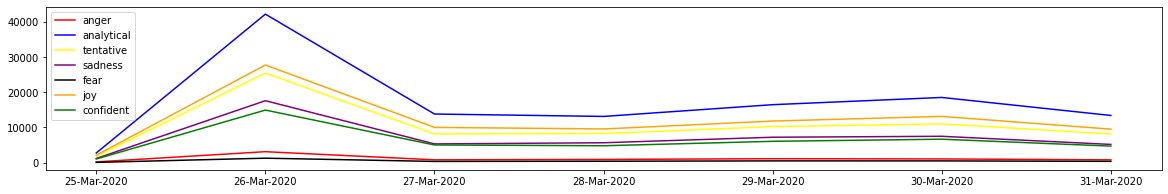

In [ ]:
import matplotlib.pyplot as plt

new_df = filtered_df[filtered_df['created'] >= '25 Mar 2020']

plt.rcParams["figure.figsize"] = (20,3)
anger_df = new_df.drop(new_df.columns.difference(['anger','created']), axis=1)
anger_df = anger_df.groupby(["created"]).anger.sum().reset_index()
plt.plot(anger_df['created'], anger_df['anger'], label='anger', color='red')

analytical_df = new_df.drop(new_df.columns.difference(['analytical','created']), axis=1)
analytical_df = analytical_df.groupby(["created"]).analytical.sum().reset_index()
plt.plot(analytical_df['created'], analytical_df['analytical'], label='analytical', color='blue')

tentative = new_df.drop(new_df.columns.difference(['tentative','created']), axis=1)
tentative = tentative.groupby(["created"]).tentative.sum().reset_index()
plt.plot(tentative['created'], tentative['tentative'], label='tentative', color='yellow')

sadness = new_df.drop(new_df.columns.difference(['sadness','created']), axis=1)
sadness = sadness.groupby(["created"]).sadness.sum().reset_index()
plt.plot(sadness['created'], sadness['sadness'], label='sadness', color='purple')

fear = new_df.drop(new_df.columns.difference(['fear','created']), axis=1)
fear = fear.groupby(["created"]).fear.sum().reset_index()
plt.plot(fear['created'], fear['fear'], label='fear', color='black')

joy = new_df.drop(new_df.columns.difference(['joy','created']), axis=1)
joy = joy.groupby(["created"]).joy.sum().reset_index()
plt.plot(joy['created'], joy['joy'], label='joy', color='orange')


confident = new_df.drop(new_df.columns.difference(['confident','created']), axis=1)
confident = confident.groupby(["created"]).confident.sum().reset_index()
plt.plot(confident['created'], confident['confident'], label='confident', color='green')


plt.legend()
plt.show()

In [ ]:
import pycountry
country_tones_temporal = filtered_df[['created', 'country', 'anger',	'fear',	'joy',	'sadness'	,'analytical',	'confident',	'tentative']].copy()
country_tones_temporal = country_tones_temporal.groupby(["country", "created"]).sum().reset_index()
country_tones_temporal['country_name'] = country_tones_temporal['country'].apply(lambda x : pycountry.countries.get(alpha_2=x).name)
country_tones_temporal

,country,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name
0,AD,20-Mar-2020,0,0,0,0,2,0,0,Andorra
1,AD,25-Mar-2020,1,0,25,10,28,14,24,Andorra
2,AD,26-Mar-2020,11,13,358,192,444,243,385,Andorra
3,AD,27-Mar-2020,5,4,135,31,154,90,139,Andorra
4,AD,28-Mar-2020,6,2,132,58,147,110,134,Andorra
...,...,...,...,...,...,...,...,...,...,...
1454,ZW,27-Mar-2020,1,1,17,5,24,21,10,Zimbabwe
1455,ZW,28-Mar-2020,0,0,8,5,12,8,20,Zimbabwe
1456,ZW,29-Mar-2020,0,0,19,16,33,15,31,Zimbabwe
1457,ZW,30-Mar-2020,1,2,31,13,43,20,36,Zimbabwe


In [ ]:
country_tones_temporal

,country_code,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name,lockdown_date_x,lockdown_type_x,lockdown_date_y,lockdown_type_y,sadness_to_happiness_ratio
0,AD,20-Mar-2020,0,0,0,0,2,0,0,Andorra,2020-03-16,Full,2020-03-16,Full,NaN
1,AD,25-Mar-2020,1,0,25,10,28,14,24,Andorra,2020-03-16,Full,2020-03-16,Full,0.400000
2,AD,26-Mar-2020,11,13,358,192,444,243,385,Andorra,2020-03-16,Full,2020-03-16,Full,0.536313
3,AD,27-Mar-2020,5,4,135,31,154,90,139,Andorra,2020-03-16,Full,2020-03-16,Full,0.229630
4,AD,28-Mar-2020,6,2,132,58,147,110,134,Andorra,2020-03-16,Full,2020-03-16,Full,0.439394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,ZW,27-Mar-2020,1,1,17,5,24,21,10,Zimbabwe,NaN,NaN,NaN,NaN,0.294118
1497,ZW,28-Mar-2020,0,0,8,5,12,8,20,Zimbabwe,NaN,NaN,NaN,NaN,0.625000
1498,ZW,29-Mar-2020,0,0,19,16,33,15,31,Zimbabwe,NaN,NaN,NaN,NaN,0.842105
1499,ZW,30-Mar-2020,1,2,31,13,43,20,36,Zimbabwe,NaN,NaN,NaN,NaN,0.419355


In [ ]:
a = filtered_df[['country','created', 'tweet']].groupby(['country', 'created']).count().reset_index()
a.columns = ['country_code', 'created', 'tweet_count']
country_tones_temporal_with_count=  pd.merge(country_tones_temporal,a, on=['country_code', 'created'])
for tone in tones:
  country_tones_temporal_with_count[tone + '_ratio'] = country_tones_temporal_with_count[tone] / country_tones_temporal_with_count['tweet_count']
country_tones_temporal_with_count

,country_code,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name,lockdown_date_x,lockdown_type_x,lockdown_date_y,lockdown_type_y,sadness_to_happiness_ratio,tweet_count,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio
0,AD,20-Mar-2020,0,0,0,0,2,0,0,Andorra,2020-03-16,Full,2020-03-16,Full,NaN,2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,AD,25-Mar-2020,1,0,25,10,28,14,24,Andorra,2020-03-16,Full,2020-03-16,Full,0.400000,95,0.010526,0.000000,0.263158,0.105263,0.294737,0.147368,0.252632
2,AD,26-Mar-2020,11,13,358,192,444,243,385,Andorra,2020-03-16,Full,2020-03-16,Full,0.536313,1605,0.006854,0.008100,0.223053,0.119626,0.276636,0.151402,0.239875
3,AD,27-Mar-2020,5,4,135,31,154,90,139,Andorra,2020-03-16,Full,2020-03-16,Full,0.229630,527,0.009488,0.007590,0.256167,0.058824,0.292220,0.170778,0.263757
4,AD,28-Mar-2020,6,2,132,58,147,110,134,Andorra,2020-03-16,Full,2020-03-16,Full,0.439394,542,0.011070,0.003690,0.243542,0.107011,0.271218,0.202952,0.247232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,ZW,27-Mar-2020,1,1,17,5,24,21,10,Zimbabwe,NaN,NaN,NaN,NaN,0.294118,88,0.011364,0.011364,0.193182,0.056818,0.272727,0.238636,0.113636
1497,ZW,28-Mar-2020,0,0,8,5,12,8,20,Zimbabwe,NaN,NaN,NaN,NaN,0.625000,57,0.000000,0.000000,0.140351,0.087719,0.210526,0.140351,0.350877
1498,ZW,29-Mar-2020,0,0,19,16,33,15,31,Zimbabwe,NaN,NaN,NaN,NaN,0.842105,113,0.000000,0.000000,0.168142,0.141593,0.292035,0.132743,0.274336
1499,ZW,30-Mar-2020,1,2,31,13,43,20,36,Zimbabwe,NaN,NaN,NaN,NaN,0.419355,139,0.007194,0.014388,0.223022,0.093525,0.309353,0.143885,0.258993


In [ ]:
country_tones_temporal_with_count['day'] = country_tones_temporal_with_count['created'].str.split('-').str[0]
country_tones_temporal_with_count

,country_code,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name,lockdown_date_x,lockdown_type_x,lockdown_date_y,lockdown_type_y,sadness_to_happiness_ratio,tweet_count,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,day
0,AD,20-Mar-2020,0,0,0,0,2,0,0,Andorra,2020-03-16,Full,2020-03-16,Full,NaN,2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20
1,AD,25-Mar-2020,1,0,25,10,28,14,24,Andorra,2020-03-16,Full,2020-03-16,Full,0.400000,95,0.010526,0.000000,0.263158,0.105263,0.294737,0.147368,0.252632,25
2,AD,26-Mar-2020,11,13,358,192,444,243,385,Andorra,2020-03-16,Full,2020-03-16,Full,0.536313,1605,0.006854,0.008100,0.223053,0.119626,0.276636,0.151402,0.239875,26
3,AD,27-Mar-2020,5,4,135,31,154,90,139,Andorra,2020-03-16,Full,2020-03-16,Full,0.229630,527,0.009488,0.007590,0.256167,0.058824,0.292220,0.170778,0.263757,27
4,AD,28-Mar-2020,6,2,132,58,147,110,134,Andorra,2020-03-16,Full,2020-03-16,Full,0.439394,542,0.011070,0.003690,0.243542,0.107011,0.271218,0.202952,0.247232,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,ZW,27-Mar-2020,1,1,17,5,24,21,10,Zimbabwe,NaN,NaN,NaN,NaN,0.294118,88,0.011364,0.011364,0.193182,0.056818,0.272727,0.238636,0.113636,27
1497,ZW,28-Mar-2020,0,0,8,5,12,8,20,Zimbabwe,NaN,NaN,NaN,NaN,0.625000,57,0.000000,0.000000,0.140351,0.087719,0.210526,0.140351,0.350877,28
1498,ZW,29-Mar-2020,0,0,19,16,33,15,31,Zimbabwe,NaN,NaN,NaN,NaN,0.842105,113,0.000000,0.000000,0.168142,0.141593,0.292035,0.132743,0.274336,29
1499,ZW,30-Mar-2020,1,2,31,13,43,20,36,Zimbabwe,NaN,NaN,NaN,NaN,0.419355,139,0.007194,0.014388,0.223022,0.093525,0.309353,0.143885,0.258993,30


In [ ]:
country_tones_temporal_with_count[country_tones_temporal_with_count.country_code == 'US']

,country_code,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name,lockdown_date_x,lockdown_type_x,lockdown_date_y,lockdown_type_y,sadness_to_happiness_ratio,tweet_count,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,day
1408,US,19-Mar-2020,0,0,0,0,0,0,0,United States,2020-03-23,Partial,2020-03-23,Partial,NaN,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
1409,US,25-Mar-2020,17,3,204,88,202,119,216,United States,2020-03-23,Partial,2020-03-23,Partial,0.431373,836,0.020335,0.003589,0.244019,0.105263,0.241627,0.142344,0.258373,25
1410,US,26-Mar-2020,198,55,2081,1212,2294,1313,2734,United States,2020-03-23,Partial,2020-03-23,Partial,0.582412,9392,0.021082,0.005856,0.221572,0.129046,0.244250,0.139800,0.291099,26
1411,US,27-Mar-2020,47,20,802,339,759,429,860,United States,2020-03-23,Partial,2020-03-23,Partial,0.422693,2984,0.015751,0.006702,0.268767,0.113606,0.254357,0.143767,0.288204,27
1412,US,28-Mar-2020,60,13,717,344,674,398,869,United States,2020-03-23,Partial,2020-03-23,Partial,0.479777,3007,0.019953,0.004323,0.238444,0.114400,0.224144,0.132358,0.288992,28
1413,US,29-Mar-2020,69,14,886,424,816,493,1040,United States,2020-03-23,Partial,2020-03-23,Partial,0.478555,3555,0.019409,0.003938,0.249226,0.119269,0.229536,0.138678,0.292546,29
1414,US,30-Mar-2020,65,28,870,377,789,450,962,United States,2020-03-23,Partial,2020-03-23,Partial,0.433333,3402,0.019106,0.008230,0.255732,0.110817,0.231922,0.132275,0.282775,30
1415,US,31-Mar-2020,50,12,825,323,728,420,865,United States,2020-03-23,Partial,2020-03-23,Partial,0.391515,2952,0.016938,0.004065,0.279472,0.109417,0.246612,0.142276,0.293022,31


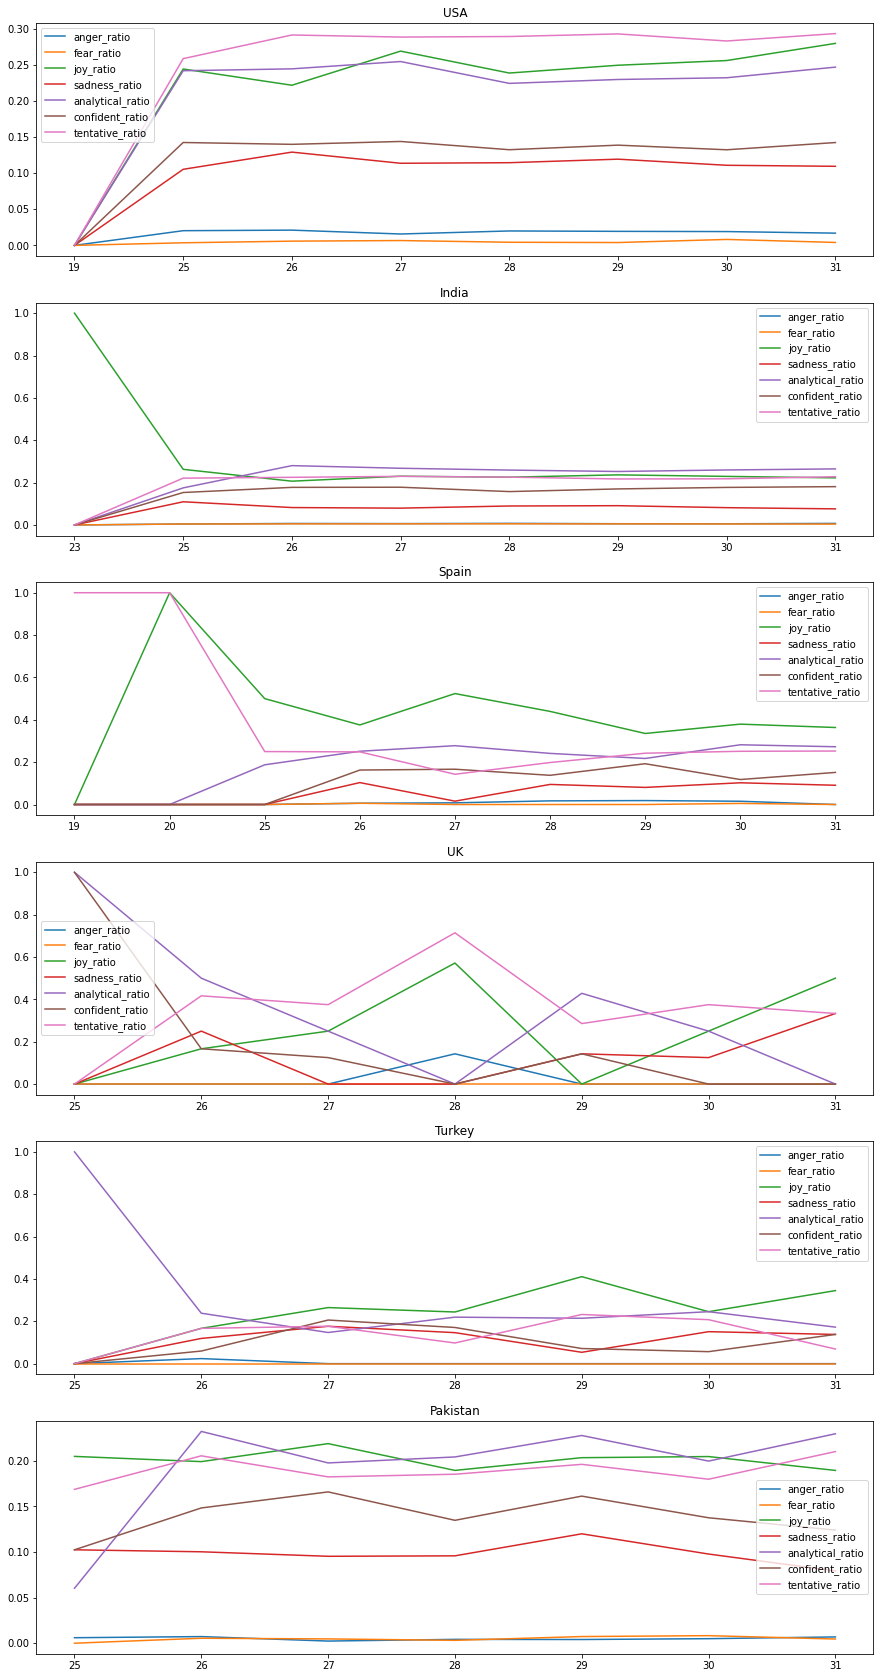

In [ ]:
import matplotlib.pyplot as plt

country_codes_highest_cases = ['US',  'IN',  'ES', 'GB','TR',  'PK',]
country_names = ['USA', 'India', 'Spain', 'UK', 'Turkey', 'Pakistan']

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(15,30))

cols = []
for row in ax:
    cols.append(row)

i = 0
for country_code, country_name in zip(country_codes_highest_cases, country_names):
  temp_df = country_tones_temporal_with_count[country_tones_temporal_with_count.country_code == country_code]
  for column in tones:
    cols[i].plot(temp_df['day'], temp_df[column+'_ratio'], label=column + '_ratio')
  cols[i].set_title(country_name)
  cols[i].legend()
  i+=1

plt.show()

In [ ]:
country_tones_temporal = country_tones_temporal.rename(columns={'country': 'country_code'})
country_tones_temporal = pd.merge(country_tones_temporal, lockdown_df, on='country_code', how='left')
country_tones_temporal['sadness_to_happiness_ratio'] = country_tones_temporal['sadness'] / country_tones_temporal['joy']
country_tones_temporal

,country_code,created,anger,fear,joy,sadness,analytical,confident,tentative,country_name,lockdown_date_x,lockdown_type_x,lockdown_date_y,lockdown_type_y,sadness_to_happiness_ratio
0,AD,20-Mar-2020,0,0,0,0,2,0,0,Andorra,2020-03-16,Full,2020-03-16,Full,NaN
1,AD,25-Mar-2020,1,0,25,10,28,14,24,Andorra,2020-03-16,Full,2020-03-16,Full,0.400000
2,AD,26-Mar-2020,11,13,358,192,444,243,385,Andorra,2020-03-16,Full,2020-03-16,Full,0.536313
3,AD,27-Mar-2020,5,4,135,31,154,90,139,Andorra,2020-03-16,Full,2020-03-16,Full,0.229630
4,AD,28-Mar-2020,6,2,132,58,147,110,134,Andorra,2020-03-16,Full,2020-03-16,Full,0.439394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,ZW,27-Mar-2020,1,1,17,5,24,21,10,Zimbabwe,NaN,NaN,NaN,NaN,0.294118
1497,ZW,28-Mar-2020,0,0,8,5,12,8,20,Zimbabwe,NaN,NaN,NaN,NaN,0.625000
1498,ZW,29-Mar-2020,0,0,19,16,33,15,31,Zimbabwe,NaN,NaN,NaN,NaN,0.842105
1499,ZW,30-Mar-2020,1,2,31,13,43,20,36,Zimbabwe,NaN,NaN,NaN,NaN,0.419355


In [ ]:
country_tones[country_tones.country_code == 'IT']

,country_code,anger,fear,joy,sadness,analytical,confident,tentative,country_name,tweet_count,lockdown_date_x,lockdown_type_x,anger_ratio,fear_ratio,joy_ratio,sadness_ratio,analytical_ratio,confident_ratio,tentative_ratio,lockdown_date_y,lockdown_type_y,happiness_to_sadness_ratio
113,IT,15,1,240,86,204,130,226,Italy,832,2020-03-11,Full,0.018029,0.001202,0.288462,0.103365,0.245192,0.15625,0.271635,2020-03-11,Full,2.790698
